# Chapter 6: The Hydrogen Atom
Prof. Eugene DePrince, Florida State University

The last few notebooks have considered analytically solvable model problems involving translational, vibrational, and rotational motion of quantum particles. Here, we consider a hydrogenic atom (a nucleus plus a single electron), which is the most complex problem for which we can find a closed-form analytic solution. This notebook outlines the solution to the time-independent Schrödinger equation for a hydrogenic atom and provides Python code to visualize and interpret the resulting wave functions.

## The Hamiltonian

Consider the Hamiltonian for an electron interacting with a nucleus of mass, $m_\text{n}$

$$\begin{align}
\hat{H} = -\frac{\hbar^2}{2m_\text{e}}\nabla_\text{e}^2  - \frac{\hbar^2}{2m_\text{n}}\nabla_\text{n}^2 + V(r)
\end{align}$$

where the subscripts "e" and "n" refer to the electron and respectively, $r$ refers to the distance between the electron and nucleus

$$\begin{align}
\vec{r} &= \vec{r}_\text{n} - \vec{r}_\text{e} \\
r &= |\vec{r}|
\end{align}$$

The potential is the Coulomb potential

$$\begin{align}
V(r) = -\frac{Z e^2}{4 \pi \epsilon_0 r}
\end{align}$$

where $Z$ is the atomic number for the nucleus, $e$ represents the magnitude of the charge of an electron, and $\epsilon_0$ is the permittivity of free space. As written, this Hamiltonian is not separable, but, as discussed in the previous notebook, we can re-express it in a separable form by performing a coordinate transformation. Specifically, we represent the Hamiltonian using the inter-particle coordinate, $\vec{r},$ and the center-of-mass coordinate, defined by

$$\begin{align}
\vec{R} = \frac{m_\text{e} \vec{r}_\text{e} + m_\text{n} \vec{r}_\text{n}}{m_\text{e} + m_\text{n}}
\end{align}$$

With these coordinates, the Hamiltonian is expressible as

$$\begin{align}
\hat{H} = -\frac{\hbar^2}{2M}\nabla_M^2  - \frac{\hbar^2}{2\mu}\nabla_\mu^2 + V(r)
\end{align}$$

where $\mu$ is the reduced mass defined by

$$\begin{align}
\mu = \frac{m_\text{e}m_\text{n}}{m_\text{e} + m_\text{n}}
\end{align}$$

and $\nabla_M^2$ and $\nabla_\mu^2$ are Laplacians for the center-of-mass and inter-particle coordinates, respectively. This Hamiltonian is separable in $\vec{R}$ (the first term) and $\vec{r}$ (the second and third terms). As discussed in the previous notebook, this structure implies that the wave function will be a product wave function

$$ \begin{align}
\psi(\vec{R}, \vec{r}) = \psi_M(\vec{R}) \psi_\mu(\vec{r})
\end{align}$$

and the energy will be expressible as a sum

$$ \begin{align}
E = E_M + E_\mu
\end{align}$$

We are free to determine these wave functions and energies from separate one-particle Schrödinger equations

$$\begin{align}
\hat{H}_M \psi_M(\vec{R}) &= E_M \psi_M(\vec{R}) \\
\hat{H}_\mu \psi_\mu(\vec{r}) &= E_\mu \psi_\mu(\vec{r})
\end{align}$$

where

$$\begin{align}
\hat{H}_M  &= -\frac{\hbar^2}{2M}\nabla_M^2  \\
\hat{H}_\mu &= - \frac{\hbar^2}{2\mu}\nabla_\mu^2 + V(r) 
\end{align}$$

The center-of-mass problem resembles the free-particle problem, and $E_M$ is thus simply the non-quantized translational energy for the hydrogenic atom as a whole. The inter-particle part of the problem is much more interesting and is the source of the quantization of the energy levels for the system. Thus, for the remainder of this notebook, we focus only on the $\mu$ dependent part of the problem and suppress the subscript $\mu,$ for simplicity. We have

$$\begin{align}
\hat{H} &= - \frac{\hbar^2}{2\mu}\nabla^2 - \frac{Ze^2}{4\pi\epsilon_0 r}
\end{align}$$

Note that the Coulomb potential is **spherically symmetrical**, i.e., it depends only on the distance between the electron and nucleus, so the hydrogenic atom problem is thus a **central force problem**. As discussed in the previous notebook, the wave function for a central force problem is factorizable as

$$\begin{align}
\psi(r, \theta, \phi) = R(r) Y^m_l(\theta, \phi)
\end{align}$$

where $R(r)$ is a radial wave function and the functions $Y^m_l(\theta, \phi)$ are spherical harmonics. From this expression, it appears that the hydrogenic atom wave functions will be eigenfunctions of the operators for the square of the orbital angular momentum $(\hat{L}^2)$ and the $z$ projection of the angular momentum $(\hat{L}_z).$ 


The existence of simultaneous eigenfunctions of $\hat{H},$ $\hat{L}^2,$ and $\hat{L}_z$ implies that these operators should all commute with one another. We already know from the last notebook that 

$$\begin{align}
[\hat{L}^2, \hat{L}_z] = 0
\end{align}$$

Let us confirm that the Hamiltonian commutes with the $\hat{L}^2$ and $\hat{L}_z$ operators. First, consider the commutator with $\hat{L}^2$

$$\begin{align}
[\hat{H}, \hat{L}^2] &= [\hat{T}, \hat{L}^2] + [V(r), \hat{L}^2] \\
&= [\hat{T}, \hat{L}^2]
\end{align}$$

where the commutator involving $V(r)$ must be zero because, as we learned in the previous notebook, $\hat{L}^2$ does not contain any derivatives with respect to $r.$ We also recall from the previous notebook that the kinetic energy operator can be expressed in spherical polar coordinates as 

$$
\begin{align}
\hat{T} = -\frac{\hbar^2}{2\mu}\left ( \frac{\partial^2}{\partial r^2} + \frac{2}{r}\frac{\partial}{\partial r} \right ) + \frac{1}{2\mu r^2}\hat{L}^2
\end{align}
$$

Now,

$$\begin{align}
[\hat{T}, \hat{L}^2] &= -\frac{\hbar^2}{2\mu}\left [ \frac{\partial^2}{\partial r^2} + \frac{2}{r}\frac{\partial}{\partial r} , \hat{L}^2\right ] + \frac{1}{2\mu r^2}[\hat{L}^2, \hat{L}^2] \\
&= 0
\end{align}$$

The first term on the right-hand side of the commutator is zero because $\hat{L}^2$ does not contain any derivatives with respect to $r,$ and the second term vanishes because the commutator of any operator with itself is zero. As such, we can safely say that

$$\begin{align}
[\hat{H}, \hat{L}^2] &= 0
\end{align}$$

as expected. Similarly, for the commutator of $\hat{H}$ and $\hat{L}_z$ we have 


$$\begin{align}
[\hat{H}, \hat{L}_z] &= -\frac{\hbar^2}{2\mu}\left [ \frac{\partial^2}{\partial r^2} + \frac{2}{r}\frac{\partial}{\partial r} , \hat{L}_z\right ] + \frac{1}{2\mu r^2}[\hat{L}^2, \hat{L}_z] + [V(r), \hat{L}_z] \\
&= 0
\end{align}$$

where the first and third terms vanish because $\hat{L}_z$ does not contain any derivatives with respect to $r,$ and the second term vanishes because $\hat{L}^2$ and $\hat{L}_z$ commute. 

## The Radial Equation

We have already noted that the hydrogenic atom problem is a central force problem, and, as a result, the wave function is factorizable as

$$\begin{align}
\psi(r, \theta, \phi) = R(r) Y^m_l(\theta, \phi)
\end{align}$$

These functions are eigenfunctions of $\hat{H},$ $\hat{L}^2,$ and $\hat{L}_z$ satisfying

$$\begin{align}
\hat{H} R(r) Y^m_l(\theta, \phi) &= E R(r) Y^m_l(\theta, \phi) \\
\hat{L}^2 R(r) Y^m_l(\theta, \phi) &= l(l+1)\hbar^2 R(r) Y^m_l(\theta, \phi) \\
\hat{L}_z R(r) Y^m_l(\theta, \phi) &= m \hbar R(r) Y^m_l(\theta, \phi) \\
\end{align}$$

with 

$$\begin{align}
l &= 0, 1, 2, ... \\
m &= 0, \pm 1, \pm 2, ... \pm l
\end{align}$$

We can use the fact that $\psi(r, \theta, \phi)$ is an eigenfunction of $\hat{L}^2$ to simplify the Schrödinger equation because

$$\begin{align}
\hat{T} R(r)Y^m_l(\theta, \phi) &= -\frac{\hbar^2}{2\mu} \left ( \frac{d^2 R(r)}{d r^2} + \frac{2}{r}\frac{d R(r)}{d r} \right )Y^m_l(\theta, \phi) + R(r)\frac{1}{2\mu r^2}\hat{L}^2Y^m_l(\theta, \phi) \\
&= -\frac{\hbar^2}{2\mu} \left ( R^{\prime\prime}(r) + \frac{2}{r}R^\prime(r) \right )Y^m_l(\theta, \phi) + \frac{l(l+1)\hbar^2}{2\mu r^2}R(r)Y^m_l(\theta, \phi)
\end{align}$$

The Schrödinger equation then reads

$$\begin{align}
\hat{H} R(r)Y^m_l(\theta, \phi) &= E R(r)Y^m_l(\theta, \phi) \\
\left [ -\frac{\hbar^2}{2\mu} \left ( R^{\prime\prime}(r) + \frac{2}{r}R^\prime(r) \right ) + \left ( \frac{l(l+1)\hbar^2}{2\mu r^2} + V(r) \right ) R(r) \right ] Y^m_l(\theta, \phi) &= E R(r)Y^m_l(\theta, \phi) \\
-\frac{\hbar^2}{2\mu} \left ( R^{\prime\prime}(r) + \frac{2}{r}R^\prime(r) \right ) + \left ( \frac{l(l+1)\hbar^2}{2\mu r^2} + V(r) \right ) R(r) &= E R(r) \\
\end{align}$$

where the last line is the **radial equation** for the hydrogenic atom problem.

It is interesting to note that this form reveals an additional $r-$ and $l$-dependent term that looks something like a potential, which is sometimes called the centrifugal potential:

$$ V_{\rm centrifugal} = \frac{l(l+1)\hbar^2}{2\mu r^2}. $$

It is instructive to combine this with the true Coulomb potential to construct an effective potential that the electron experiences, which is evidently a function of both the dynamical variable $r$ and the $l$ quantum number:

$$ V_{\rm eff} = \frac{l(l+1)\hbar^2}{2\mu r^2} - \frac{Z e^2}{4 \pi \epsilon_0 r}. $$


We can get some idea of what the form of the radial function that satisfies the radial equation should be by inspecting various limits. First, let us assume that the energy, $E$ is non-negative and then consider the limit that $r$ becomes large. In this case, we have

$$\begin{align}
\lim_{r\to\infty} \frac{1}{r} &= 0 \\
\lim_{r\to\infty} \frac{1}{r^2} &= 0 \\
\lim_{r\to\infty} V(r) &= 0
\end{align}$$

so the radial equation reduces to 

$$\begin{align}
-\frac{\hbar^2}{2\mu} R^{\prime\prime}(r) &= E R(r)
\end{align}$$

which has possible solutions of the form

$$\begin{align}
R(r) = e^{\pm i(2 \mu E / \hbar^2)^{1/2} r}
\end{align}$$

If $E$ is non-negative, then the radial function would be a complex exponential function, and the resulting state would represent an electron that is not bound to the nucleus (an ionized state). All non-negative energies are allowed, so there exists a continuum of these unbound states.  

Let us now consider states with $E < 0,$ which we will soon find are bound states. Before inspecting any limits, we note with <b><font color='red'>i</font><font color='orange'>n</font><font color='yellow'>f</font><font color='green'>i</font><font color='blue'>n</font><font color='indigo'>i</font><font color='violet'>t</font><font color='red'>e</font> <font color='orange'>w</font><font color='yellow'>i</font><font color='green'>s</font><font color='blue'>d</font><font color='indigo'>o</font><font color='violet'>m</font></b> that it will be useful to first rearrange the radial equation and then make some clever substitutions. Rearranging the radial equation and multiplying through by $\frac{2\mu r^2}{\hbar^2}$ leads to 

$$\begin{align}
-r^2\left ( R^{\prime \prime} + \frac{2}{r} R^\prime \right ) + l(l+1) R + \frac{2\mu r^2}{\hbar^2} [V(r) - E]R = 0
\end{align}$$

where we have suppressed the $r$ dependence of the function, $R.$ Having already noted how clever we are, we recognize that

$$\begin{align}
r^2\left ( R^{\prime \prime} + \frac{2}{r} R^\prime \right ) = \frac{d}{dr} \left( r^2 \frac{dR}{dr} \right)
\end{align}$$

which gives us

$$\begin{align}
-\frac{d}{dr} \left( r^2 \frac{dR}{dr} \right) + \left ( l(l+1)  + \frac{2\mu r^2}{\hbar^2} [V(r) - E]\right ) R = 0
\end{align}$$

Now, we introduce an auxiliary function

$$\begin{align}
u(r) = rR(r)
\end{align}$$

and represent $R(r)$ and its derivatives in terms of $u(r)$

$$\begin{align}
R &= \frac{u}{r} \\
\frac{dR}{dr} &= \frac{du}{dr}\frac{1}{r} - \frac{u}{r^{2}} \\
r^2\frac{dR}{dr} &= r \frac{du}{dr} - u \\
\frac{d}{dr}r^2\frac{dR}{dr} &= \frac{du}{dr} + r\frac{d^2u}{dr^2} - \frac{d u}{dr} \\
&= r\frac{d^2u}{dr^2}
\end{align}$$

where we have suppressed the $r$ dependence of the functions, $R$ and $u.$

We can now write the radial equation in terms of $u(r)$ as

$$\begin{align}
-r\frac{d^2u}{dr^2} + \left ( \frac{l(l+1)}{r} + \frac{2\mu r}{\hbar^2} [V(r) - E] \right ) u = 0
\end{align}$$

If we then multiply through by $\frac{\hbar^2}{2\mu E r}$ and rearrange, we obtain

$$\begin{align}
-\frac{\hbar^2}{2\mu E} \frac{d^2 u}{dr^2} = \left [1 - \frac{V(r)}{E} - \frac{\hbar^2}{2\mu E} \frac{l(l+1)}{r^2} \right ] u
\end{align}$$

We simplify our notation by introducing a real-valued constant

$$\begin{align}
k = \left ( \frac{-2\mu E}{\hbar^2} \right ) ^{1/2}
\end{align}$$

or

$$\begin{align}
E = -\frac{k^2\hbar^2}{2\mu}
\end{align}$$

to give

$$\begin{align}
\frac{1}{k^2} \frac{d^2 u}{dr^2} = \left [1 - \frac{2\mu V(r)}{k^2\hbar^2} + \frac{l(l+1)}{(kr)^2} \right ] u
\end{align}$$

At this point, in a moment of sheer brilliance, we decide that it may be worth reminding ourselves of the actual form of the potential, 

$$\begin{align}
V(r) = -\frac{Ze^2}{4\pi \epsilon_0 r}
\end{align}$$

which, for kicks, we decide to insert into the radial equation in an enticing way

$$\begin{align}
\frac{1}{k^2} \frac{d^2 u}{dr^2} = \left [1 - \frac{\mu Z e^2}{2\pi \epsilon_0 \hbar^2 k }\left ( \frac{1}{kr} \right)  + l(l+1) \left ( \frac{1}{kr} \right )^2 \right ] u
\end{align}$$

Aha! It seems like a change of variables might be in order. Let us select

$$\begin{align}
\rho = k r 
\end{align}$$

lump as many constants as possible into a single constant, $\bar{\rho},$

$$\begin{align}
\bar{\rho} = \frac{\mu Z e^2}{2\pi\epsilon_0\hbar^2 k}
\end{align}$$

and replace $\frac{d}{dr}$ using the chain rule

$$\begin{align}
\frac{d}{dr} = \frac{d\rho}{d r}\frac{d}{d\rho} = k\frac{d}{d\rho}
\end{align}$$

At long last, we have

$$\begin{align}
\frac{d^2 u}{d \rho^2} = \left [ 1 - \frac{\bar{\rho}}{\rho} + \frac{l(l+1)}{\rho^2}\right ] u
\end{align}$$

which does not seem so bad!

At this point, we may begin inspecting limits to get an idea of the functional form for $u(\rho)$. Let us start with the limit or large $\rho$ or $r.$ In this limit

$$\begin{align}
\frac{d u(\rho)}{d\rho^2} = u(\rho)
\end{align}$$

This equation has a general solution

$$\begin{align}
u(\rho) = A e^{-\rho} + Be^{\rho}
\end{align}$$

However, because

$$\begin{align}
\lim_{\rho\to\infty} e^{\rho} = \infty
\end{align}$$

we must choose $B=0,$ and, as a result, we expect that

$$\begin{align}
u(\rho) \sim Ae^{-\rho}
\end{align}$$

in the limit that $\rho$ becomes large.

Now, let us consider the limit that $\rho$ approaches zero. In this limit, we expect the $l(l+1)$ term to dominate and have

$$\begin{align}
\frac{d u(\rho)}{d\rho^2} = \frac{l(l+1)}{\rho^2} u(\rho)
\end{align}$$

We put on our differential equations hats and note that the presence of $\frac{1}{\rho^2}$ suggests that $u(\rho)$ may be a polynomial in $\rho.$ Indeed, a general solution to this equation would be 

$$\begin{align}
u(\rho) = C \rho^{l+1} + D \rho^{-l}
\end{align}$$

We note, however, that 

$$\begin{align}
\lim_{\rho\to 0} \rho^{-l} = \infty
\end{align}$$

for non-zero $l,$ so we must choose $D=0,$ and, as a result, we expect that

$$\begin{align}
u(\rho) \sim C\rho^{l+1}
\end{align}$$

in the limit that $\rho$ approaches zero.

**Practice**

Show that  
$$
u(\rho) = C \rho^{l+1} + D \rho^{-l}
$$  
is a solution to the differential equation  
$$
\frac{d^2 u(\rho)}{d\rho^2} = \frac{l(l+1)}{\rho^2} u(\rho)
$$

<details>
<summary>Click to show answer</summary>

We plug the general solution into the differential equation.

Let  
$$
u(\rho) = C \rho^{l+1} + D \rho^{-l}
$$  
Then compute the second derivative:  
$$
\frac{d^2 u}{d\rho^2} = C(l+1)(l) \rho^{l-1} + D(-l)(-l-1) \rho^{-l-2}
= C l(l+1) \rho^{l-1} + D l(l+1) \rho^{-l-2}
$$  
Now factor $ \frac{l(l+1)}{\rho^2} u(\rho) $:
$$
\frac{l(l+1)}{\rho^2} u(\rho)
= \frac{l(l+1)}{\rho^2}(C \rho^{l+1} + D \rho^{-l})
= C l(l+1) \rho^{l-1} + D l(l+1) \rho^{-l-2}
$$  
Thus, both sides are equal and the function is a solution. ✅

</details>


Having established the form of $u(\rho)$ in the limits of large and small $\rho,$ we now must find a functional form that satisfies the radial equation while stitching together these two limits. We choose

$$\begin{align}
u(\rho) = \rho^{l+1} e^{-\rho} w(\rho)
\end{align}$$

and seek a power-series solution to the radial equation with

$$\begin{align}
w(\rho) = \sum_{j=0}^\infty c_j \rho^j
\end{align}$$

We probably all agree that we have suffered through enough math for one day, so the interested reader is directed to Chapter 6 of Levine's [Quantum Chemistry textbook](https://www.amazon.com/Quantum-Chemistry-7th-Ira-Levine/dp/0321803450), which provides a detailed solution to the remainder of this problem. In short, after a bit of calculus and algebra, one finds a two-term recursion relation for the series expansion coefficients:

$$\begin{align}
c_{j+1} = \frac{2(l+j+1) - \bar{\rho}}{(2l+2+j)(j+1)}c_j
\end{align}$$

Even with this recursion relation, our job is not done. We must ensure that the resulting wave function is well behaved. To do so, we will proceed in a similar manner as when we studied the quantum harmonic oscillator problem. In the limit that $j$ becomes large, the series expansion coefficients have the form

$$\begin{align}
c_{j+1} = \frac{2}{j+1}c_j
\end{align}$$

If this was exactly the form of the series, then we could state

$$\begin{align}
c_j = \frac{2^j}{j!} c_0
\end{align}$$

and

$$\begin{align}
w(\rho) &= c_0 \sum_{j=0}^\infty \frac{2^j}{j!}\rho^j \\
&= c_0e^{2\rho}
\end{align}$$

Inserting this result into our expression for $u(\rho)$ gives

$$\begin{align}
u(\rho) = c_0 \rho^{l+1} e^{\rho}
\end{align}$$

which is not well behaved when $\rho\to\infty$! So, as was the case in the quantum harmonic oscillator and the particle-on-a-sphere models, the power series expansion for $w(\rho)$ must truncate at some point, with $j = j_\text{max},$ in order for the wave function to be well behaved. At $j_\text{max}$ we have

$$ c_{j_\text{max}} = 0 = 2(l + j_\text{max} + 1) - \bar{\rho}$$

At this point, we introduce a new quantum number, $n = l + j_\text{max} + 1,$ which we will call the **principal quantum number**. We can see that $l \le n - 1$ and the minimum value for $n$ is one, just like we learn in our general chemistry courses. 

The principle quantum number is related to the energy of the hydrogenic atom, but it will take just a bit more algebra to see exactly how. We know that $\bar{\rho} = 2n,$ and that $\bar{\rho}$ is related to a number of fundamental constants. We have

$$\begin{align}
\bar{\rho} = 2n &= \frac{\mu Z e^2}{2\pi\epsilon_0\hbar^2 k} \\
\end{align}$$

and thus

$$\begin{align}
4n^2 &= \frac{\mu^2 Z^2 e^4}{4\pi^2\epsilon_0^2\hbar^4 k^2} \\
\end{align}$$

Recall that 

$$\begin{align}
k = \left ( \frac{-2\mu E}{\hbar^2} \right ) ^{1/2}
\end{align}$$

which, when inserted into the previous expression, leads to 

$$\begin{align}
E_n = -\frac{\mu}{2\hbar^2}\left ( \frac{Ze}{4\pi\epsilon_0} \right )^2 \left ( \frac{1}{n^2} \right )
\end{align}$$

This result is somewhat remarkable in the sense that it is identical to the energy from the Bohr model of the hydrogen atom (perhaps to within the difference between $\mu$ and $m_\text{e}$), despite the fact that Bohr's model is build on incorrect physics. Regardless, from this expression, it is clear that the energy of the hydrogenic atom is quantized, and that the energy levels become more closely spaced as $n$ increases. Moreover, for each value of $n$, there are $n$ possible values of the orbital angular momentum quantum number, $l,$ and $2l+1$ possible values of the magnetic quantum number, $m,$ for each $l$ value:

$$\begin{align}
n &= 1, 2, 3 ... \\
l &= 0, 1, 2 ... n-1 \\
m &= 0, \pm 1, \pm 2, ... \pm l
\end{align}$$

Because the energy depends only on the principal quantum number, each energy level has an overall degeneracy equal to $n^2.$

The following Python code illustrates how the energy levels become more closely spaced as the principal quantum number increases. For this example, we consider a hydrogen atom ($Z=1$). Because the mass of the proton, $m_\text{p},$ is much greater than the mass of the electron, we approximate the reduced mass as

$$\begin{align}
\mu = \frac{m_\text{e} m_\text{p}}{m_\text{e} + m_\text{p}} \approx m_\text{e}
\end{align}$$

We also use atomic units, where

$$\begin{align}
m_\text{e} &= 1 \\
4\pi\epsilon_0 &= 1 \\
\hbar &= 1
\end{align}$$

so that the energy levels are simply

$$\begin{align}
E_n = -\frac{1}{2n^2}
\end{align}$$

We would also like to visualize the potential, $V(r),$ which, for a hydrogen atom, in atomic units is 

$$\begin{align}
V(r) = -\frac{1}{r}
\end{align}$$

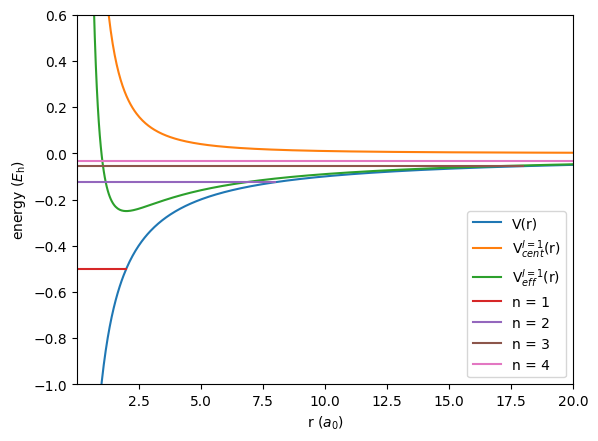

In [11]:
import numpy as np
import matplotlib.pyplot as plt

minr = 0.01
maxr = 20
r = np.linspace(minr, maxr, 500)
V = - 1 / r
l = 1
V_cent = l * (l + 1) / (2 * r ** 2)
V_eff = V_cent + V

fig = plt.figure()

plt.xlim(minr, maxr)
plt.ylim(-1, 0.6)
plt.xlabel(r'r ($a_0$)')
plt.ylabel(r'energy ($E_{\rm h}$)')

plt.plot(r, V, label = 'V(r)')
plt.plot(r, V_cent, label='V$_{cent}^{l=1}$(r)')
plt.plot(r, V_eff, label='V$_{eff}^{l=1}$(r)')

for n in range (1, 5):
    energy = -0.5 / n**2

    # let's make the energy level lines span the potential.
    # where is V(r) = energy? 
    # -1/r = energy
    # r = -1/energy
    label = 'n = ' + str(n)
    plt.plot([0, -1.0/energy], [energy, energy], label = label)

plt.legend()
plt.show()

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
import ipywidgets as widgets

# Define the plotting function
def plot_effective_potential(l=1):
    minr = 0.01
    maxr = 20
    r = np.linspace(minr, maxr, 500)
    
    V = -1 / r
    V_cent = l * (l + 1) / (2 * r ** 2)
    V_eff = V + V_cent

    plt.figure(figsize=(8, 5))
    plt.xlim(minr, maxr)
    plt.ylim(-1, 0.6)
    plt.xlabel(r'$r\ (a_0)$')
    plt.ylabel(r'Energy ($E_h$)')

    plt.plot(r, V, label=r'$V(r) = -1/r$')
    plt.plot(r, V_cent, label=rf'$V_{{\rm cent}}^{{\ell={l}}}(r)$')
    plt.plot(r, V_eff, label=rf'$V_{{\rm eff}}^{{\ell={l}}}(r)$')

    for n in range(1, 5):
        energy = -0.5 / n**2
        r_line = -1.0 / energy
        label = f'n = {n}'
        plt.plot([0, r_line], [energy, energy], label=label)

    plt.legend()
    plt.grid(True)
    plt.show()

# Create interactive widget
interact(plot_effective_potential, l=widgets.IntSlider(min=0, max=5, step=1, value=1))


interactive(children=(IntSlider(value=1, description='l', max=5), Output()), _dom_classes=('widget-interact',)…

<function __main__.plot_effective_potential(l=1)>

In this figure, the symbols $E_\text{h}$ and $a_0$ represent the atomic units of energy (the Hartree) and distance (the Bohr), respectively.

> Practice
>
> > Question 2
>> 
> > How much energy is required to ionize an electron from the ground state of the hydrogen atom?
> >
>><details>
>><summary>Answer 2</summary> 
>>Let us approximate the reduced mass as $\mu \approx m_\text{e}$ and use atomic units, where 
    $$\begin{align}
    \hbar = m_\text{e} = 4\pi\epsilon_0 = 1
    \end{align}$$ 
>>The ground-state energy is
  $$\begin{align}
E_1 = -\frac{1}{2} E_\text{h}
\end{align}$$
>> The bound energy levels for the hydrogen atom become more closely spaced with increasing $n$ until we reach the continuum. We can determine the energy required to remove the electron by determining from the limit
>>$$\begin{align}
\lim_{n\to\infty} E_n = \lim_{n\to\infty} -\frac{1}{2n^2} = 0
\end{align}$$
>> So, the amount of energy required to reach the continuum from the ground state is
$$\begin{align}
0 - E_1 = \frac{1}{2} E_\text{h}
\end{align}$$
>></details>

Before moving on to discuss the wave functions, we connect these energy levels to spectral lines discussed in general chemistry or undergraduate physical chemistry courses. Emission lines for hydrogenic atoms correspond to differences in these energy levels 

$$\begin{align}
\tilde{\nu} &= \frac{1}{\lambda} = \frac{1}{hc}(E_{n_f} - E_{n_i}) \\
&= \left ( \frac{1}{hc} \right ) \left ( \frac{\mu}{2\hbar^2} \right ) \left ( \frac{Ze^2}{4\pi\epsilon_0} \right )^2 \left ( \frac{1}{n_i^2} - \frac{1}{n_f^2} \right ) \\
\end{align}$$

where $n_i$ and $n_f$ represent the principal quantum numbers for the initial and final states, respectively. We can also express the lines using the Rydberg constant, $R_A,$ for atom $A$ with charge $Z_A$ and mass $m_A$ as

$$\begin{align}
\tilde{\nu} = R_A Z_A^2 \left ( \frac{1}{n_i^2} - \frac{1}{n_f^2} \right )
\end{align}$$

with

$$\begin{align}
R_A &= \frac{\mu_A}{2 \hbar^2}\left ( \frac{e^2}{4\pi \epsilon_0} \right ) \\
\mu_A &= \frac{m_\text{e} m_A}{m_\text{e} + m_A}
\end{align}$$

## Wave Functions and Radial Distribution Functions

Before delving into the form of the hydrogenic atom wave functions, we introduce some nomenclature. A hydrogenic wave function defined by the quantum numbers $n,$ $l,$ and $m$ is also referred to as an **orbital**. The set of wave functions or orbitals having a common value of $n$ is called a **shell**. The set of wave functions or orbitals having common $n$ and $l$ values is called a **subshell**. When labeling orbitals, we can use the nomenclature $n_{L_m},$ where $L$ is the symbol corresponding to the orbital angular momentum quantum number 

|$l$ | label |
|---|---|
| 0 | $s$ |
| 1 | $p$ |
| 2 | $d$ |
| 3 | $f$ |
| 4 | $g$ |


So, the orbital with $n=3,$ $l=2,$ and $m=0$ could be labeled $3d_0$ or $\psi_{3d_0}.$


Now, what about the actual form of the wave functions? For the radial part, we know that

$$\begin{align}
u(\rho) &= \rho^{l+1}e^{-\rho}w(\rho) \\
&= \rho^{l+1}e^{-\rho} \sum^{n-l-1}_{j=0}c_j \rho^j
\end{align}$$

but what we really want is the radial function, $R(r).$ Given our original definition of $\rho = kr$ and the fact that $k$ is related to the energy, $E,$ and, thus, the principal quantum number, $n,$ one can show that

$$\begin{align}
\rho = \frac{Zr}{an}
\end{align}$$

where 

$$\begin{align}
a = \frac{4\pi \epsilon_0 \hbar^2}{\mu e^2}
\end{align}$$

This quantity, $a,$ has units of distance and is closely related to the Bohr radius,

$$\begin{align}
a_0 = \frac{4\pi \epsilon_0 \hbar^2}{m_e e^2} \approx 0.52918 ~{\rm Å}
\end{align}$$

Now, we have

$$\begin{align}
u(r) = \left ( \frac{Zr}{an} \right ) ^{l+1}e^{-Zr/an}\sum^{n-l-1}_{j=0}c_j \left ( \frac{Zr}{an} \right )^j
\end{align}$$

Recall that $u(r) = rR(r),$ so the radial function is

$$\begin{align}
R_{n, l}(r) = \left ( \frac{Z}{an} \right ) ^{l+1} r^l e^{-Zr/an}\sum^{n-l-1}_{j=0}c_j \left ( \frac{Zr}{an} \right )^j
\end{align}$$

where we have introduced subscripts $n$ and $l$ in the notation for the radial function. As such, all orbitals belonging to the same subshell share a common radial factor.  The overall wave function is

$$\begin{align}
\psi_{n,l,m}(r, \theta, \phi) = R_{n, l}(r) Y^m_l(\theta, \phi)
\end{align}$$


### The Ground-State Wave Function ($n = 1$)
The ground-state wave function corresponds to $n = 1$ and $l=m=0,$

$$\begin{align}
\psi_{1,0,0}(r, \theta, \phi) = R_{1, 0}(r) Y^0_0(\theta, \phi)
\end{align}$$

For the radial part, we have

$$\begin{align}
R_{1, 0}(r) = \left ( \frac{Z}{a} \right ) c_0 e^{-Zr/a}
\end{align}$$

We can lump all of the constants together into a single (real-valued) constant, $N,$ that is determined by normalization, 

$$\begin{align}
R_{1, 0}(r) = N e^{-Zr/a}
\end{align}$$

$$\begin{align}
1 &= \int |\psi_{1,0,0}|^2 d\tau \\
&= \int_0^\infty r^2 dr \int_0^\pi \sin(\theta) d\theta \int_0^{2\pi} d\phi |\psi_{1,0,0}|^2 \\
&= \int_0^\infty r^2 dr |R_{1,0}|^2  \int_0^\pi \sin(\theta) d\theta \int_0^{2\pi} d\phi |y^0_0|^2 \\
&= N^2 \int_0^\infty r^2 e^{-2Zr/a} dr
\end{align}$$

where, on the last line, we have noted that the spherical harmonics are already normalized. Using an integral table, we find

$$\begin{align}
N = 2\left ( \frac{Z}{a} \right )^{3/2}
\end{align}$$

and

$$\begin{align}
R_{1, 0}(r) = 2\left ( \frac{Z}{a} \right )^{3/2} e^{-Zr/a}
\end{align}$$

For $l=m=0,$ we also have

$$\begin{align}
Y^0_0(\theta, \phi) = \left(\frac{1}{4\pi}\right)^{1/2}
\end{align}$$

so the full ground-state wave function is

$$\begin{align}
\psi_{1,0,0}(r, \theta, \phi) = \frac{1}{\pi^{1/2}}\left ( \frac{Z}{ a} \right )^{3/2} e^{-Zr/a}
\end{align}$$

We can more easily visualize this wave function in cartesian coordinates

$$\begin{align}
\psi_{1,0,0}(x, y, z) = \frac{1}{\pi^{1/2}}\left ( \frac{Z}{ a} \right )^{3/2} e^{-Z(x^2+y^2+z^2)^{1/2}/a}
\end{align}$$

Consider a slice in the $z$ direction, where $x=0$ and $y=0$. Then

$$\begin{align}
\psi_{1,0,0}(x, y, z) = \frac{1}{\pi^{1/2}}\left ( \frac{Z}{ a} \right )^{3/2} e^{-Z|z|/a}
\end{align}$$

The following Python code will plot this slice of the wave function. We will assume that we are dealing with a hydrogen atom ($Z = 1$) and approximating the reduced mass as $\mu = m_\text{e}$ (or $a = a_0$). We will also use atomic units, where $a_0 = 1.$


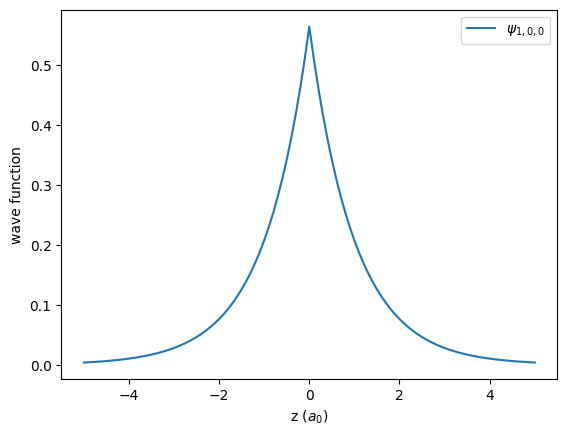

In [13]:
z = np.linspace(-5, 5, 101)
wfn = 1.0 / np.sqrt(np.pi) * np.exp(-np.abs(z))

plt.plot(z, wfn, label = r'$\psi_{1,0,0}$')
plt.ylabel('wave function')
plt.xlabel(r'z ($a_0$)')
plt.legend()
plt.show()

As can be seen, there is a cusp in the wave function at $z=0.$ The presence of this derivative discontinuity does not imply that the wave function is not well behaved at this point, though, because the potential is not finite at $x = y = z = 0$

$$\begin{align}
\lim_{r\to\infty} V(r) = -\infty
\end{align}$$

In addition to the cusp, we note that this function is spherically symmetrical, i.e., for a given value of $r,$ it looks the same, regardless of the values of $\theta$ and $\phi.$ This symmetry is the reason that $s$ type orbitals are visualized as spheres in general chemistry courses. 

### Excited-State Wave Functions ($n > 1$)

Radial functions for the three lowest-energy shells are tabulated here.

| $R_{n,l}(r)$  | 
|---|
| $R_{1,0} = 2\left(\frac{Z}{a}\right )^{3/2} e^{-Zr/a}$ |
| $R_{2,0} = \frac{1}{\sqrt{2}}\left(\frac{Z}{a}\right )^{3/2} \left(1 - \frac{Zr}{2a}\right )e^{-Zr/2a}$ |
| $R_{2,1} = \frac{1}{2\sqrt{6}}\left(\frac{Z}{a}\right )^{5/2} r e^{-Zr/2a}$ |
| $R_{3,0} = \frac{2}{3\sqrt{3}}\left(\frac{Z}{a}\right )^{3/2} \left ( 1 -\frac{2Zr}{3a} + \frac{2Z^2r^2}{27a^2}\right ) e^{-Zr/3a}$ |
| $R_{3,1} = \frac{8}{27\sqrt{6}}\left(\frac{Z}{a}\right )^{3/2} \left (\frac{Zr}{a} - \frac{Z^2r^2}{6a^2}\right ) e^{-Zr/3a}$ |
| $R_{3,2} = \frac{4}{81\sqrt{30}}\left(\frac{Z}{a}\right )^{7/2} r^2  e^{-Zr/3a}$ |

For $n=2,$ we have four degenerate orbitals with $l = 0, m = 0$ (the $2s$ orbital) and $l = 1, m = 0, \pm 1$ (three $2p$ orbitals). The Python code below visualizes the radial functions for these two subshells. Again, we assume we are dealing with a hydrogen atom ($Z=1$), we approximate $\mu = m_\text{e},$ and we use atomic units.

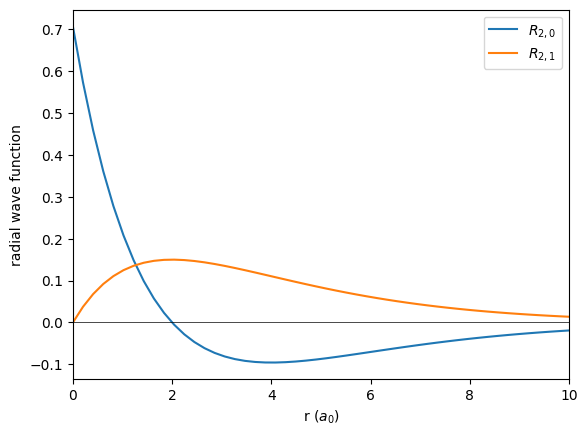

In [14]:
r = np.linspace(0, 10)
R20 = 1 / np.sqrt(2) * (1.0 - 0.5 * r) * np.exp(-0.5 * r)
R21 = 1 / (2 * np.sqrt(6)) * r * np.exp(-0.5 * r)

plt.plot(r, R20, label = r'$R_{2, 0}$')
plt.plot(r, R21, label = r'$R_{2, 1}$')
plt.axhline(y=0.0, color='black', linewidth=0.5)
plt.ylabel('radial wave function')
plt.xlabel(r'r ($a_0$)')
plt.legend()
plt.xlim(0, 10)
plt.show()

Like the $1s$ orbital, the radial function for the $2s$ orbital is non-zero at the nucleus. On the other hand, $R_{2, 1}$ is zero at the nucleus, due to the presence of the $r^l$ term in the radial wave function ($l=1$ for the $2p$ orbitals). The second major difference between these radial functions is that $R_{2,0}$ changes sign as it passes through zero. This type of feature is a node, specifically, a **radial node**. A radial node occurs when the wave function passes through zero at a fixed value of $r$. On the other hand, an **angular node** is defined by a plane where the wave function passess through zero. The number of nodes of each type are tabulated below.

| number of nodes | type of node |
|---|---|
|$n-1$ | total |
|$l$   | angular |
|$n-l-1$ | radial |

As indicated by the table, the $2p$ orbitals (with $l=1$) should display one node, and that node should be an angular node. The presence and meaning of this angular node becomes clear if we remind ourselves of the functional form spherical harmonics that comprise the angular part of the hydrogenic atom wave functions.

|   |   |
|---|---|
|   $Y^0_0(\theta,\phi)$ | $\frac{1}{2}\sqrt{\frac{1}{\pi}}$ |
|   $Y^0_1(\theta,\phi)$ | $\frac{1}{2}\sqrt{\frac{3}{\pi}} \cos(\theta)$ |
|   $Y^{\pm 1}_1(\theta,\phi)$ | $\mp\frac{1}{2}\sqrt{\frac{3}{2\pi}} e^{\pm i \phi}\sin(\theta)$ |
|   $Y^0_2(\theta,\phi)$ | $\frac{1}{4}\sqrt{\frac{5}{\pi}}\left (3 \cos^2(\theta)-1\right)$ |
|   $Y^{\pm 1}_2(\theta,\phi)$ | $\mp\frac{1}{2}\sqrt{\frac{15}{2\pi}}e^{\pm i \phi}\sin(\theta) \cos(\theta)$ |
|   $Y^{\pm 2}_2(\theta,\phi)$ | $\frac{1}{4}\sqrt{\frac{15}{2\pi}}e^{\pm 2i \phi}\sin^2(\theta)$ |

We can see that the angular part of the $2p_0$ wave orbital is 

$$\begin{align}
Y^0_1(\theta, \phi) = \frac{1}{2}\left ( \frac{3}{\pi}\right )^{1/2} \cos(\theta)
\end{align}$$

which will be zero in the plane defined by $\theta = \frac{\pi}{2}$ radians or $90\degree$. In the spherical polar coordinate system depicted below, this angle represents the $xy$ plane, defined by $z=0$. 

In [15]:
from IPython.display import Image
Image(url = "https://raw.githubusercontent.com/deprincelab/deprincelab.github.io/main/tutorials/jupyter_notebooks/rotation/spherical_polar_coordinates.png", width=300)

Indeed, when we consider the full wave function for the $2p_0$ orbital

$$\begin{align}
\psi_{2, 1, 0}(r, \theta, \phi) &= R_{2, 1}(r) Y^0_1(\theta, \phi) \\
&= \frac{1}{4(2\pi)^{1/2}}\left(\frac{Z}{a}\right )^{5/2} r \cos(\theta) e^{-Zr/2a} \\
\end{align}$$

and note that $z = r\cos(\theta),$ we can see that this orbital contains a factor of $z$

$$\begin{align}
\psi_{2, 1, 0}(r, \theta, \phi) = \frac{1}{4(2\pi)^{1/2}}\left( \frac{Z}{a} \right )^{5/2} z e^{-Zr/2a}
\end{align}$$

that defines the nodal plane. This structure is why the $2p_0$ orbital is also called $2p_z$. If, like done above for the $1s$ orbital, we visualize a slice of the $2p_z$ orbital where $x = y = 0,$ we can see that the form of this wave function fits our general chemistry picture of an orbital having two lobes of opposite phase. Mathematically, we can see that this phase refers to the sign of the wave function. The following Python code illustrates this slice of the $2p_z$ orbital, under the same assumptions used above (for $Z=1,$ etc.).

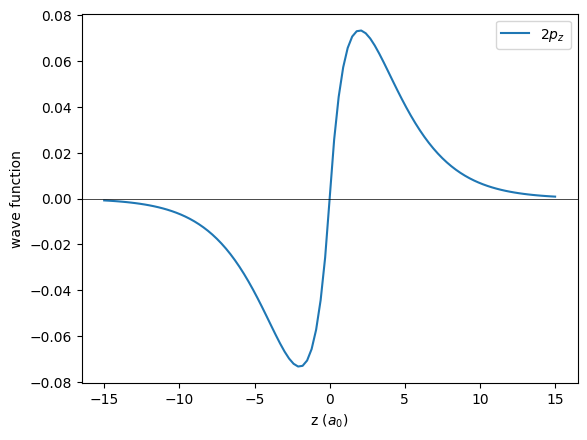

In [16]:
z = np.linspace(-15, 15, 101)
wfn = 1.0 / (4*np.sqrt(6))*np.sqrt(3/np.pi) * z * np.exp(-np.abs(z)/2)

plt.plot(z, wfn, label = r'$2p_z$')
plt.axhline(y=0.0, color='black', linewidth=0.5)

plt.ylabel('wave function')
plt.xlabel(r'z ($a_0$)')
plt.legend()
plt.show()

### Radial Distribution Functions

The Born interpretation of the wave function for a single particle states that the probability, $P,$ of finding a particle at point $(x, y, z)$ in the volume element defined by

$$\begin{align}
[x, x+dx] \\
[y, y+dy] \\
[z, z+dz] \\
\end{align}$$

is proportional to 

$$\begin{align}
|\psi(x, y, z)|^2 dx dy dz
\end{align}$$

In spherical coordinates, we use a different definition for the volume element and

$$\begin{align}
|\psi(r, \theta, \phi)|^2 r^2 \sin(\theta) dr d\theta d\phi
\end{align}$$

For a hydrogenic atom, what is the probability of finding the electron at the radius, $r,$ and any angles, $\theta$ and $\phi$? To answer this question, we simply take the Born interpretation result in spherical coordinates and integrate out the angular degrees of freedom to obtain

$$\begin{align}
R_{n,l}^2(r) r^2 dr \int_0^\pi \sin(\theta) d\theta \int_0^{2\pi} d\phi |Y^m_l(\theta, \phi)|^2 = R_{n,l}^2(r) r^2 dr
\end{align}$$

because the spherical harmonics are normalized. We now define

$$\begin{align}
P(r) dr = R_{n, l}^2(r) r^2 dr
\end{align}$$

where $P(r)$ is known as the **radial distribution function**. The radial distribution function gives us information regarding the likelihood of finding an electron at a give distance from the nucleus.

Let us visualize the radial distribution functions for various combinations of hydrogenic orbitals, beginning with $s$ type functions ($l=0$). The following Python code does just that, under the same assumptions used above ($Z=1$, etc). It also determines the most likely distance at which we would find electrons that reside in each orbital.

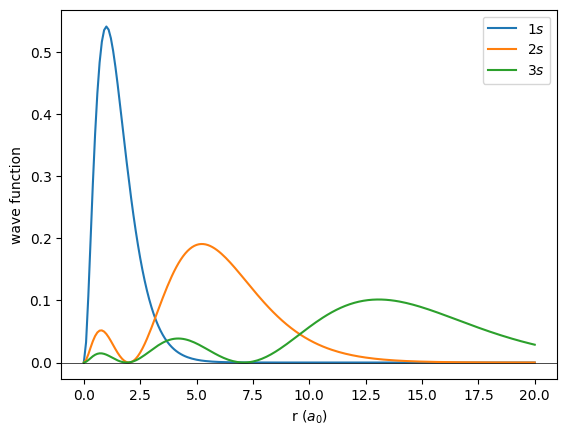

The most likely radius for a 1s electron is  1.0 a0
The most likely radius for a 2s electron is  5.2 a0
The most likely radius for a 3s electron is 13.1 a0

<r> for a 1s electron is  1.5 a0
<r> for a 2s electron is  6.0 a0
<r> for a 3s electron is 11.6 a0


/var/folders/dp/63x0n7nd4_q9b8cbskjk1xpr0000gp/T/ipykernel_53084/2882782782.py:30: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  average_r_1 = np.trapz(P10 * r, x = r)
/var/folders/dp/63x0n7nd4_q9b8cbskjk1xpr0000gp/T/ipykernel_53084/2882782782.py:31: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  average_r_2 = np.trapz(P20 * r, x = r)
/var/folders/dp/63x0n7nd4_q9b8cbskjk1xpr0000gp/T/ipykernel_53084/2882782782.py:32: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  average_r_3 = np.trapz(P30 * r, x = r)


In [17]:
r = np.linspace(0, 20, 201)
R10 = 2.0 * np.exp(-r)
R20 = 1 / np.sqrt(2) * (1.0 - 0.5 * r) * np.exp(-r/2)
R30 = 2 / (3.0 * np.sqrt(3)) * ( 1 -2*r/3 + 2*r**2/27 )* np.exp(-r/3)

P10 = r**2 * R10**2
P20 = r**2 * R20**2
P30 = r**2 * R30**2

plt.plot(r, P10, label = r'$1s$')
plt.plot(r, P20, label = r'$2s$')
plt.plot(r, P30, label = r'$3s$')
plt.axhline(y=0.0, color='black', linewidth=0.5)

plt.ylabel('wave function')
plt.xlabel(r'r ($a_0$)')
plt.legend()
plt.show()

idx_1 = np.argmax(P10)
idx_2 = np.argmax(P20)
idx_3 = np.argmax(P30)

print('The most likely radius for a 1s electron is %4.1f a0' % (r[idx_1]))
print('The most likely radius for a 2s electron is %4.1f a0' % (r[idx_2]))
print('The most likely radius for a 3s electron is %4.1f a0' % (r[idx_3]))

# expectation value of r: 
# <r> = <psi|r|psi> = <R|r|R> <Y|Y> = <R|r|R>
average_r_1 = np.trapz(P10 * r, x = r)
average_r_2 = np.trapz(P20 * r, x = r)
average_r_3 = np.trapz(P30 * r, x = r)
print('')
print('<r> for a 1s electron is %4.1f a0' % (average_r_1))
print('<r> for a 2s electron is %4.1f a0' % (average_r_2))
print('<r> for a 3s electron is %4.1f a0' % (average_r_3))
                      

These distribution functions fit our general chemistry intuition for how far electrons in different shells should lie from the nucleus. The $1s$ electron is most likely to be found closer to the nucleus than the $2s$ electron, which, in turn, is more likely to be found closer to the nucleus than the $3s$ electron. Interestingly, the most likely position for the $1s$ electron ($r_\text{max}$) is 1 $a_0,$ which agrees with the prediction made by Bohr's model. The average $r$ values (the expectation value of $r$) show similar qualitative trends. $\langle r \rangle$ for the $1s$ state is smaller than that for the $2s$ state, which is smaller than that for the $3s$ state. For the $1s$ state, in particular, note that the average $r$ value is a bit larger than the most probable $r$. We can rationalize this result based on the asymmetry of the radial distribution function; it is clear that more density lies at $r > r_\text{max}$ than $r < r_\text{max}$. Lastly, we note that the radial distribution functions for the $2s$ and $3s$ electrons go to zero once and twice, respectively, at $r$ values greater than zero. These points correspond to radial nodes. 

The following Python code provides a similar visualization for the radial distribution functions for $n=3$ and different $l$ values ($l=0, 1, 2$).

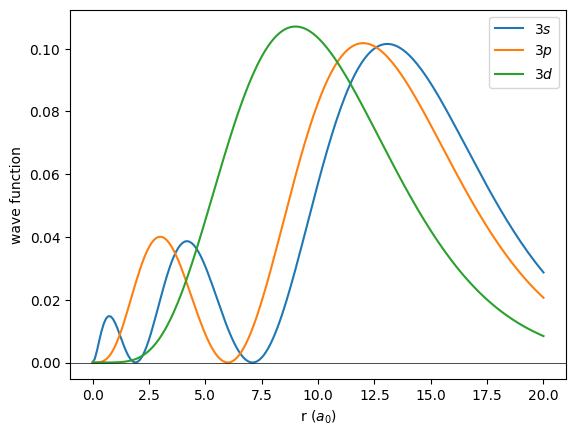

The most likely radius for a 3s electron is 13.1 a0
The most likely radius for a 3p electron is 12.0 a0
The most likely radius for a 3d electron is  9.0 a0

<r> for a 3s electron is 11.6 a0
<r> for a 3p electron is 11.2 a0
<r> for a 3d electron is 10.0 a0


/var/folders/dp/63x0n7nd4_q9b8cbskjk1xpr0000gp/T/ipykernel_53084/1190049772.py:32: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  average_r_s = np.trapz(P30 * r, x = r)
/var/folders/dp/63x0n7nd4_q9b8cbskjk1xpr0000gp/T/ipykernel_53084/1190049772.py:33: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  average_r_p = np.trapz(P31 * r, x = r)
/var/folders/dp/63x0n7nd4_q9b8cbskjk1xpr0000gp/T/ipykernel_53084/1190049772.py:34: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  average_r_d = np.trapz(P32 * r, x = r)


In [19]:
r = np.linspace(0, 20, 201)

R10 = 2.0 * np.exp(-r)
R21 = 1 / (2 * np.sqrt(6)) * r * np.exp(-0.5 * r)
R30 = 2 / (3.0 * np.sqrt(3)) * ( 1 -2*r/3 + 2*r**2/27 )* np.exp(-r/3)
R31 = 8/(27*np.sqrt(6)) * ( r - r**2/6 ) * np.exp(-r/3) 
R32 = 4/(81*np.sqrt(30)) * r**2 * np.exp(-r/3)

P30 = r**2 * R30**2
P31 = r**2 * R31**2
P32 = r**2 * R32**2

plt.plot(r, P30, label = r'$3s$')
plt.plot(r, P31, label = r'$3p$')
plt.plot(r, P32, label = r'$3d$')

plt.axhline(y=0.0, color='black', linewidth=0.5)

plt.ylabel('wave function')
plt.xlabel(r'r ($a_0$)')
plt.legend()
plt.show()

idx_s = np.argmax(P30)
idx_p = np.argmax(P31)
idx_d = np.argmax(P32)

print('The most likely radius for a 3s electron is %4.1f a0' % (r[idx_s]))
print('The most likely radius for a 3p electron is %4.1f a0' % (r[idx_p]))
print('The most likely radius for a 3d electron is %4.1f a0' % (r[idx_d]))

# expectation value of r: 
# <r> = <psi|r|psi> = <R|r|R> <Y|Y> = <R|r|R>
average_r_s = np.trapz(P30 * r, x = r)
average_r_p = np.trapz(P31 * r, x = r)
average_r_d = np.trapz(P32 * r, x = r)
print('')
print('<r> for a 3s electron is %4.1f a0' % (average_r_s))
print('<r> for a 3p electron is %4.1f a0' % (average_r_p))
print('<r> for a 3d electron is %4.1f a0' % (average_r_d))

ValueError: x and y must have same first dimension, but have shapes (500,) and (201,)

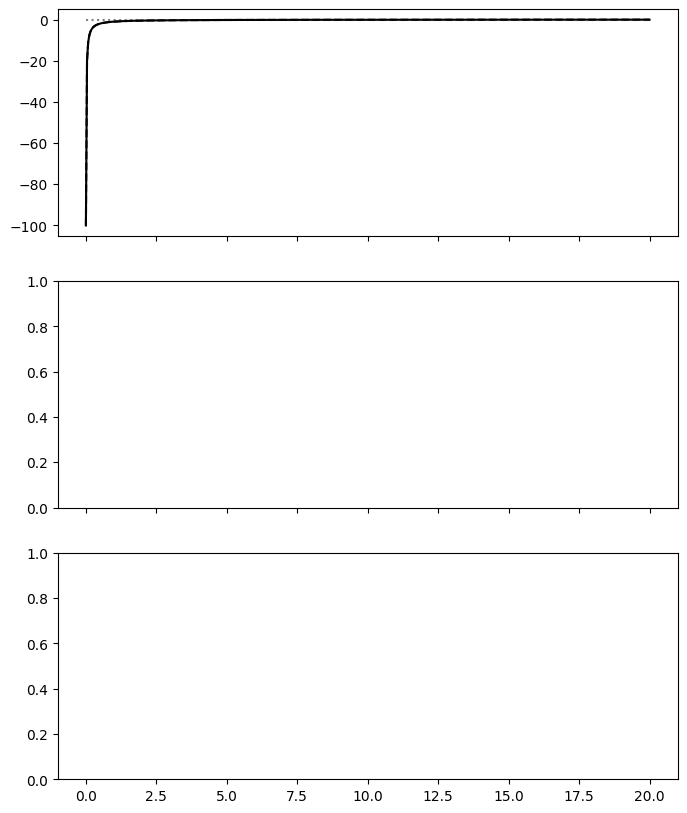

In [22]:
import numpy as np
import matplotlib.pyplot as plt

r = np.linspace(0.01, 20, 500)

# Radial wavefunctions (3s, 3p, 3d)
R30 = 2 / (3.0 * np.sqrt(3)) * (1 - 2*r/3 + 2*r**2/27) * np.exp(-r/3)
R31 = 8 / (27*np.sqrt(6)) * (r - r**2/6) * np.exp(-r/3)
R32 = 4 / (81*np.sqrt(30)) * r**2 * np.exp(-r/3)
R10 = 2.0 * np.exp(-r)
R21 = 1 / (2 * np.sqrt(6)) * r * np.exp(-0.5 * r)

# Radial probability distributions
P30 = r**2 * R30**2
P31 = r**2 * R31**2
P32 = r**2 * R32**2

P21 = r ** 2 * R21 ** 2



# Coulomb potential
V = -1 / r

# Centrifugal potentials and effective potentials
l_vals = [0, 1, 2]
V_cents = [l*(l+1) / (2 * r**2) for l in l_vals]
V_effs = [V + V_cent for V_cent in V_cents]

# Plot settings
fig, axs = plt.subplots(3, 1, figsize=(8, 10), sharex=True)

orb_labels = ['3s', '3p', '3d']
colors = ['tab:blue', 'tab:orange', 'tab:green']

for i, ax in enumerate(axs):
    l = l_vals[i]
    ax.plot(r, V, 'k--', label=r'$V(r)$ (Coulomb)')
    ax.plot(r, V_cents[i], 'gray', linestyle='dotted', label=rf'$V_{{\rm cent}}^{{\ell={l}}}(r)$')
    ax.plot(r, V_effs[i], 'k-', label=rf'$V_{{\rm eff}}^{{\ell={l}}}(r)$')

    # scale radial distribution for visual overlay
    scale = 0.5  # adjust to your taste
    #P = [P30, P31, P32][i]
    P = [P10, P21][i]
    ax.plot(r, scale * P + (-1/9), color=colors[i], label=rf'$P_{{3{["s","p","d"][i]}}}(r)$ (scaled)')

    ax.axhline(y=-1/9, color='gray', lw=0.5, linestyle=':')
    ax.set_ylabel('Energy (E$_h$)')
    ax.set_title(f'{orb_labels[i]} orbital (l = {l})')
    ax.set_ylim(-1.1, 0.6)
    ax.legend()

axs[-1].set_xlabel(r'$r$ ($a_0$)')
plt.tight_layout()
plt.show()


We can see that the most likely position for the $3d$ is closest to the nucleus, followed by $3p$ and then $3s$. The expectation values of $r$ follow this same trend.  Note also that, like the example above, the number of times that the radial distribution functions dip to zero at non-zero $r$ values reflects the number of radial nodes in the wave function.

> Practice
>
> > Question 3
> >
> > Above, we determined the most likely distance between the electron and nucleus for a hydrogen atom in the $1s$ state numerically. Verify this result by solving
> > $$\begin{align}
\frac{d}{dr} P(r) = 0
\end{align}$$
> > for $r$.
>
> > Question 4
> >
> > Determine the most likely distance between the electron and nucleus for a hydrogen atom in the $2p$ state. Try to find the result both numerically, using Python, and analytically, using calculus.
>
> > Question 5
> >
> > Above, we determined the most likely distance between the electron and nucleus for a hydrogen atom in the $3d$ state numerically. Verify this result using calculus.
> >
>
> > Question 6
>> 
> > Above, we determined the average distance between the electron and nucleus for a hydrogen atom in the $1s$ state numerically. Verify this result using calculus.
> >
>
> > Question 7
> >
> > Determine the expectation value of $r$ for a hydrogen atom in the $2p$ state. Try to find the result both numerically, using Python, and analytically, using calculus.
>
>  > Question 8
>>
> > Above, we determined the average distance between the electron and nucleus for a hydrogen atom in the $3d$ state numerically. Verify this result using calculus.

### Real-Valued Hydrogenic Orbitals

The spherical harmonics with $m \neq 0$ are complex valued, which means that the corresponding hydrogenic orbitals will also be complex. Many chemists are allergic to complex-valued quantities, so we often take linear combinations of these orbitals that result in real-valued functions. 

To illustrate this point, let us consider $2p$ orbitals, which have $n = 2,$ $l = 1,$ and $m = 0, \pm 1$. We saw above for $m=0$ that 

$$\begin{align}
\psi_{2p_z} &= \psi_{2, 1, 0}(r, \theta, \phi) \\
&= \frac{1}{4(2\pi)^{1/2}}\left( \frac{Z}{a} \right )^{5/2} z e^{-Zr/2a}\\
&= z f(r)
\end{align}$$

This result is generalizable to other hydrogenic orbitals with $l=1$ and $m=0$; all such functions are expressible as $z$ times some function of $r$. As a result all such functions can be referred to as $p_z$ type orbitals, and all $p_z$ orbitals have an angular node in the plane defined by $z=0$. 

Now, consider the orbitals with $n = 2,$ $l = 1,$ and $m = \pm 1$

$$\begin{align}
\psi_{2, 1, \pm 1}(r, \theta, \phi) &= R_{2, 1}(r) Y^{\pm 1}_1(\theta, \phi) \\
&= \mp \left ( \frac{1}{8\pi^{1/2}} \right ) \left ( \frac{Z}{a}\right )^{5/2} r \sin(\theta) e^{\pm i\phi} e^{-Zr/2a} \\
\end{align}$$

Recall the greatest equation, Euler's equation, says

$$\begin{align}
e^{\pm i\phi} = \cos(\phi) \pm i\sin(\phi)
\end{align}$$

which suggests that we can take linear combinations of $\psi_{2, 1, \pm 1}$ to eliminate the complex factors. We have

$$\begin{align}
\psi_{2p_x} &= -\frac{1}{2^{1/2}} \left ( \psi_{2,1,1} - \psi_{2,1,-1} \right )\\  
&= r\sin(\theta)\cos(\phi) f(r) \\
&= x f(r)
\end{align}$$

and

$$\begin{align}
\psi_{2p_y} &= \frac{i}{2^{1/2}} \left ( \psi_{2,1,1} + \psi_{2,1,-1} \right )\\  
&= r\sin(\theta)\sin(\phi) f(r) \\
&= y f(r)
\end{align}$$

These functions are real-valued and will have angular nodes in the planes defined by $x=0$ and $y=0$.

Are $\psi_{2p_x}$ and $\psi_{2p_y}$ solutions to the Schrödinger equation for hydrogenic atoms? Yes! As we saw several notebooks ago, a linear combination of degenerate eigenfunctions of an operator (in this case, $\hat{H}$) is still an eigenfunction of that operator, with the same eigenvalue. 

> Practice
>
> > Question 9
> >
> > Show that $\psi_{2p_x}$ and $\psi_{2p_y}$ are eigenfunctions of the Hamiltonian for the hydrogenic atom problem.

Are $\psi_{2p_x}$ and $\psi_{2p_y}$ eigenfunctions of $\hat{L}^2$? We have

$$\begin{align}
\hat{L}^2 \psi_{2p_1} &= l(l+1)\hbar^2 \psi_{2p_1} \\
&= 2\hbar^2 \psi_{2p_1} \\
\hat{L}^2 \psi_{2p_{-1}} &= 2\hbar^2 \psi_{2p_{-1}}
\end{align}$$

so 

$$\begin{align}
\hat{L}^2 \psi_{2p_x} &= -\hat{L}^2 \left (\frac{1}{2^{1/2}} \right ) \left ( \psi_{2p_1} -  \psi_{2p_{-1}} \right ) \\
&= -\left (\frac{1}{2^{1/2}} \right ) \left (\hat{L}^2 \psi_{2p_1} - \hat{L}^2 \psi_{2p_{-1}} \right ) \\
&= - \left (\frac{1}{2^{1/2}} \right ) \left (2\hbar^2 \psi_{2p_1} - 2\hbar^2 \psi_{2p_{-1}} \right ) \\
&= 2\hbar^2 \psi_{2p_x}
\end{align}$$

So, yes! Again, a linear combination of degenerate eigenfunctions of an operator (in this case, $\hat{L}^2$) is still an eigenfunction of that operator, with the same eigenvalue. 

Are $\psi_{2p_x}$ and $\psi_{2p_y}$ eigenfunctions of $\hat{L}_z$? We have

$$\begin{align}
\hat{L}_z \psi_{2p_1} &= m\hbar \psi_{2p_1} \\
&= +\hbar \psi_{2p_1} \\
\hat{L}_z \psi_{2p_{-1}} &= -\hbar \psi_{2p_{-1}}
\end{align}$$

so 

$$\begin{align}
\hat{L}_z \psi_{2p_x} &= -\hat{L}_z \left (\frac{1}{2^{1/2}} \right ) \left ( \psi_{2p_1} -  \psi_{2p_{-1}} \right ) \\
&= -\left (\frac{1}{2^{1/2}} \right ) \left (\hat{L}_z \psi_{2p_1} - \hat{L}_z \psi_{2p_{-1}} \right ) \\
&= - \left (\frac{1}{2^{1/2}} \right ) \left (\hbar \psi_{2p_1} + \hbar \psi_{2p_{-1}} \right ) \\
&= -\frac{\hbar}{2^{1/2}} \left ( \psi_{2p_1} +  \psi_{2p_{-1}} \right ) \\
&= i\hbar \psi_{2p_y}
\end{align}$$

No! $\psi_{2p_x}$ is not an eigenfunction of $\hat{L}_z$. As such, this function (and $\psi_{2p_y}$) does not have a well-defined $z$ projection of the orbital angular momentum. We have a similar result for $\psi_{2p_y}$.

> Practice
>
> >Question 10
>>
> > Show that $\psi_{2p_y}$ is not an eigenfunction of $\hat{L}_z$.

## Selection Rules

As with the quantum harmonic oscillator and rigid rotor problems, we use Fermi's Golden Rule to derive selection rules for optically allowed transitions in hydrogenic atoms. It turns out that these rules are identical to the rules for the rigid rotor, i.e.,

$$\begin{align}
\Delta l &= \pm 1 \\
\Delta m &= 0, \pm 1
\end{align}$$